In [2]:
%pip install pandas seaborn matplotlib numpy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/103.3 kB ? eta -:--:--
     -------------------------------------- 103.3/103.3 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB 3.5 MB/s eta 0:00:04
   - -------------------------------------- 0.5/11.6 MB 4.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/11.6 MB 4.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.6 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/11.6 MB 4.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.6 MB 4.2 MB/s eta 0:00:03
   ----- ----


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('case_universe.csv')


In [ ]:

# Базовий огляд даних
print("Розмір датасету:", df.shape)
print("\nПерші рядки датасету:")
print(df.head())
print("\nІнформація про датасет:")
print(df.info())


In [5]:

# Очищення даних
# Заповнення пропущених значень
df.fillna({'Uncertain': 0, 'MID': 0, 'IMI': 0, 'MIPS': 0, 'CRS': 0, 'ACD': 0}, inplace=True)


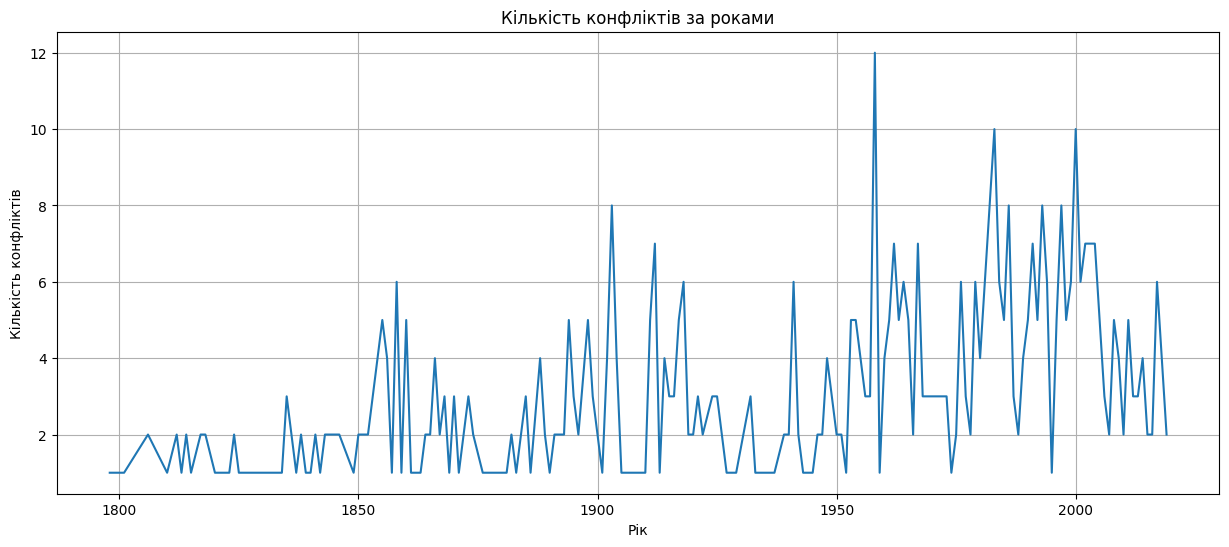

In [6]:

# Створення часового ряду конфліктів
conflicts_by_year = df.groupby('Start Year').size().reset_index(name='Number of Conflicts')

# Візуалізація кількості конфліктів за роками
plt.figure(figsize=(15, 6))
plt.plot(conflicts_by_year['Start Year'], conflicts_by_year['Number of Conflicts'])
plt.title('Кількість конфліктів за роками')
plt.xlabel('Рік')
plt.ylabel('Кількість конфліктів')
plt.grid(True)
plt.show()


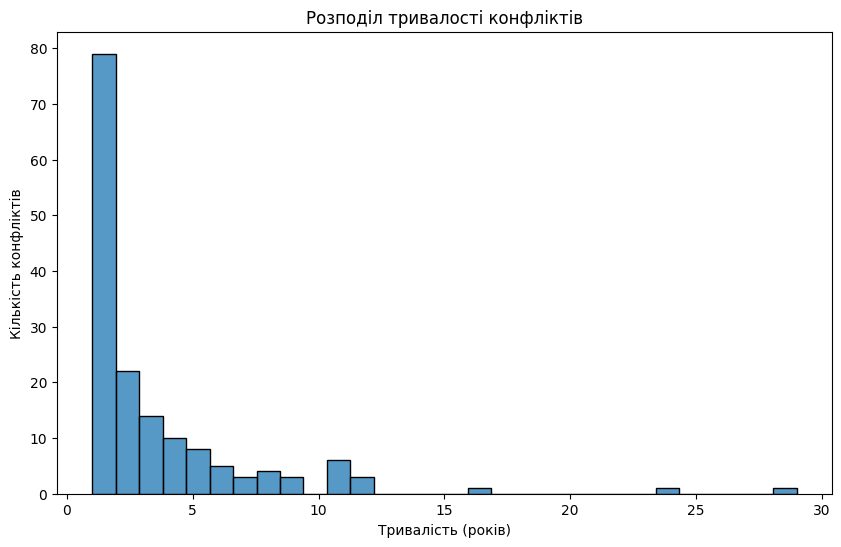

In [7]:

# Аналіз тривалості конфліктів
df['Duration'] = df['End Year'] - df['Start Year']
df['Duration'] = df['Duration'].fillna(0)

plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Duration'] > 0], x='Duration', bins=30)
plt.title('Розподіл тривалості конфліктів')
plt.xlabel('Тривалість (років)')
plt.ylabel('Кількість конфліктів')
plt.show()


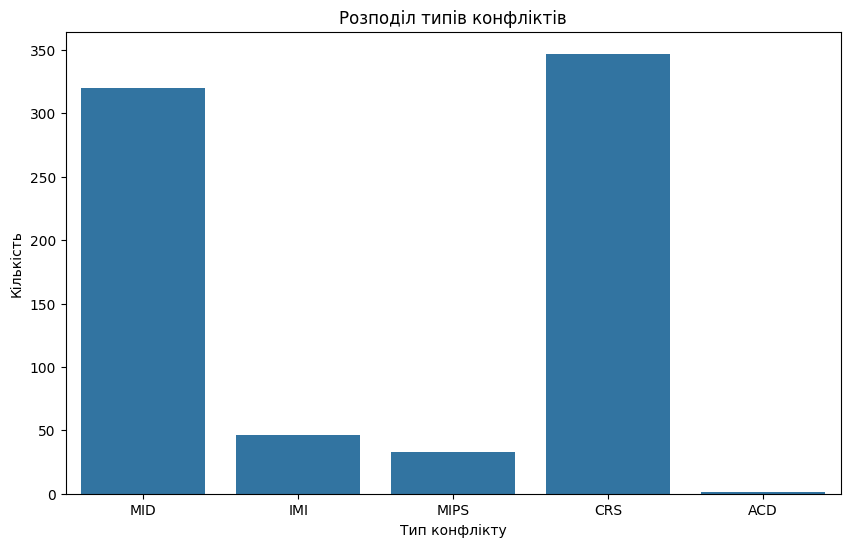

In [8]:

# Аналіз типів конфліктів
conflict_types = pd.DataFrame({
    'Type': ['MID', 'IMI', 'MIPS', 'CRS', 'ACD'],
    'Count': [
        df['MID'].sum(),
        df['IMI'].sum(),
        df['MIPS'].sum(),
        df['CRS'].sum(),
        df['ACD'].sum()
    ]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=conflict_types, x='Type', y='Count')
plt.title('Розподіл типів конфліктів')
plt.xlabel('Тип конфлікту')
plt.ylabel('Кількість')
plt.show()


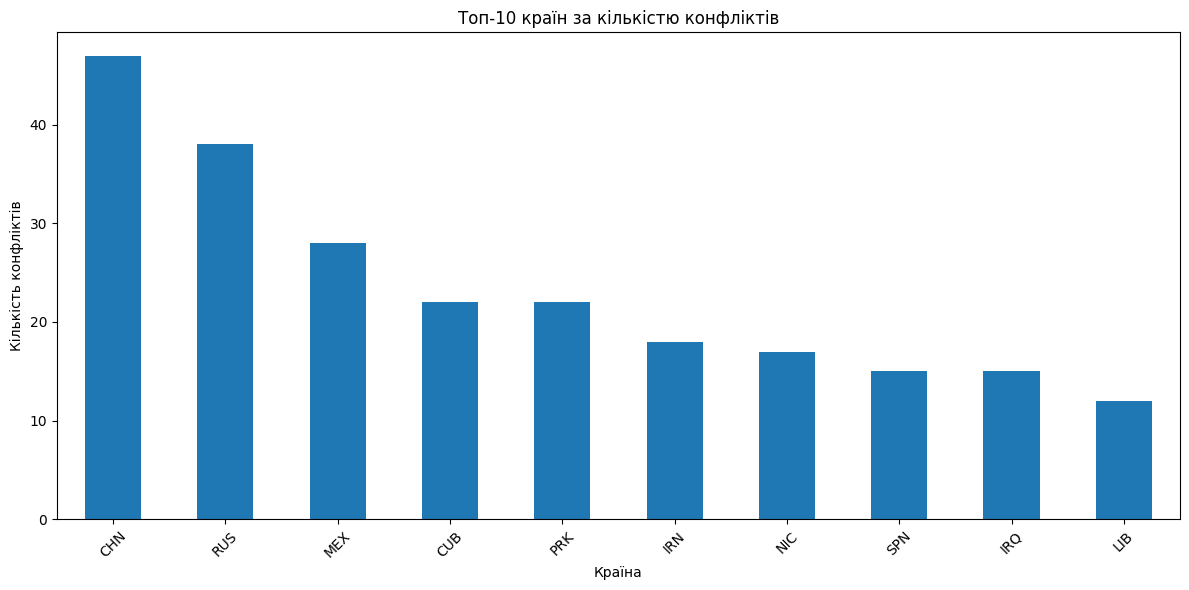

In [9]:

# Топ-10 країн за кількістю конфліктів
top_countries = df['Target State'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title('Топ-10 країн за кількістю конфліктів')
plt.xlabel('Країна')
plt.ylabel('Кількість конфліктів')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


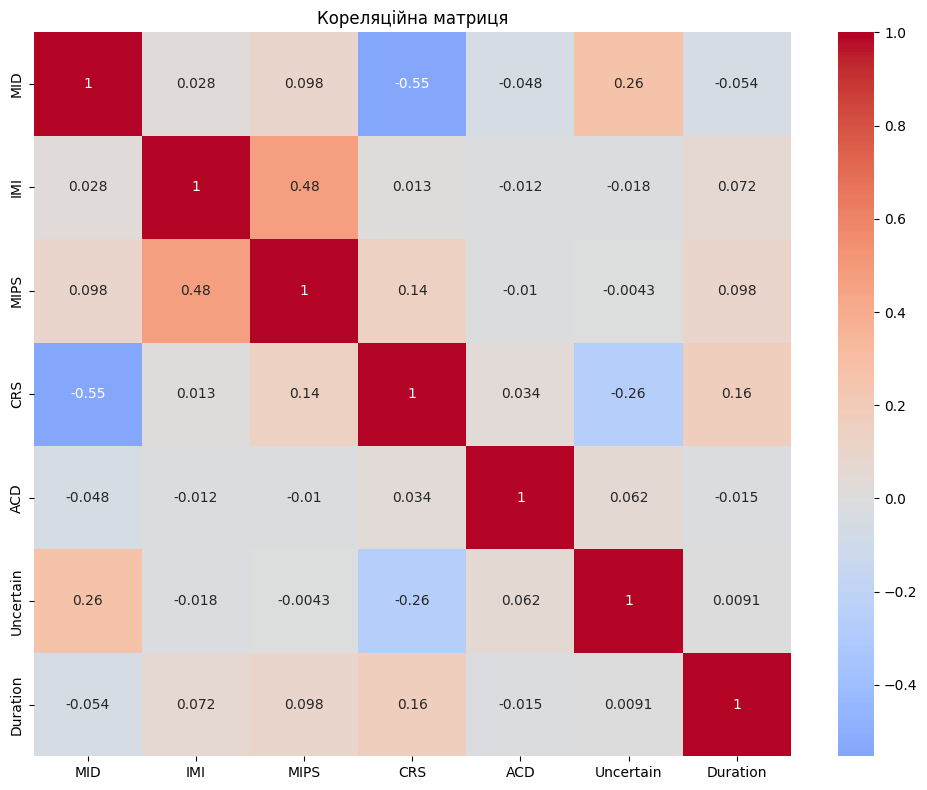

In [10]:

# Кореляційний аналіз
correlation_matrix = df[['MID', 'IMI', 'MIPS', 'CRS', 'ACD', 'Uncertain', 'Duration']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Кореляційна матриця')
plt.tight_layout()
plt.show()


In [11]:

# Статистичний опис числових змінних
print("\nОписова статистика:")
print(df[['Duration', 'MID', 'IMI', 'MIPS', 'CRS', 'ACD']].describe())


Описова статистика:
         Duration         MID         IMI        MIPS         CRS         ACD
count  569.000000  569.000000  569.000000  569.000000  569.000000  569.000000
mean     0.913884    0.562390    0.080844    0.057996    0.609842    0.001757
std      2.610508    0.496529    0.272835    0.233942    0.488215    0.041922
min     -6.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
50%      0.000000    1.000000    0.000000    0.000000    1.000000    0.000000
75%      1.000000    1.000000    0.000000    0.000000    1.000000    0.000000
max     29.000000    1.000000    1.000000    1.000000    1.000000    1.000000
